# 介绍

### 项目介绍
- 这里使用TensorFlow搭建ANN识别mnist手写数字特征

# 步骤

## 1. 导入工具库和准备数据

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

# os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
# warnings.filterwarnings('ignore')

- 这里的all_mnist_data.csv是重新包装后的所有原始mnist数据，共70000个手写数字，数据详情及下载请阅读我GitHub主页上的介绍[GitHub：acphart/Deep_in_mnist](https://github.com/acphart/Deep_in_mnist)

In [2]:
all_data = pd.read_csv('../../dataset/all_mnist_data.csv')

In [3]:
'''划分训练集，交叉验证集和测试集'''
s_size = 70000
tr_r = 50000
cv_r = 60000
s_data = all_data[: s_size]

train = s_data[:tr_r]
cv = s_data[tr_r:cv_r]
test = s_data[cv_r:]

## 2. 定义向量化函数和作图函数

In [22]:
def vectorize(y_flat):
    '''向量化函数，将数字转换成10维的one-hot向量'''
    n = len(y_flat)
    vectors = np.zeros((n, 10))
    for i in range(n):
        vectors[i][int(y_flat[i])] = 1
    return vectors 


## 3. 搭建ANN

In [5]:
'''
x, y分别为特征向量和对应的真实值向量，None代表可以同时向网络输入多个数据；
同时x也为网络第1层的激活值，第1层没有偏置。
'''
x = tf.placeholder('float32', [None, 784])
y = tf.placeholder('float32', [None, 10])

'''
w1_2为网络1、2层之间的权重矩阵；b2为第2层的偏置；a2为第2层的激活值。
'''
n_l2 = 100
stddev1 = 1./np.sqrt(784)
w1_2 = tf.Variable(tf.random_normal([784, n_l2], stddev=stddev1))
b2 = tf.Variable(tf.random_normal([n_l2]))
a2 = tf.sigmoid(tf.matmul(x, w1_2) + b2)

'''
w2_3为网络2、3层之间的权重矩阵；b3为第3层的偏置；
y_为第3层的激活值，也是整个网络的输出。
'''
stddev2=1./np.sqrt(n_l2)
w2_3 = tf.Variable(tf.random_normal([n_l2, 10], stddev=stddev2))
b3 = tf.Variable(tf.random_normal([10]))
y_ = tf.sigmoid(tf.matmul(a2, w2_3) + b3)

## 4. 超参数、代价函数和优化器

In [14]:
'''设置单批数据量大小、迭代次数、学习率、正则化参数'''
batch_size = 100
epoches = 30000
alpha = 0.002
# lmda = 5

'''cross_entropy为交叉熵代价函数'''
cross_entropy = - tf.reduce_sum(y * tf.log(y_) + (1 - y)*tf.log(1 - y_))

'''优化器'''
# cost_func = cross_entropy + lmda/batch_size*(tf.reduce_sum(w1_2**2) + tf.reduce_sum(w2_3**2))
train_step = tf.train.GradientDescentOptimizer(alpha).minimize(cross_entropy)

'''计算预测准确率'''
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))

## 5. 迭代训练

In [15]:
'''初始化全局变量'''
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)

index = 20
'''记录训练过程，作学习曲线图'''
epoch_list = []
acc_list = []
cost_list = []
'''迭代训练'''
for i in range(1,epoches+1):
    '''每次迭代随机抽取一批数据进行训练'''
    batch = train.sample(batch_size)
    x_batch = batch.values[:, 1:]
    y_batch = vectorize(batch.values[:, 0])
    sess.run(train_step, feed_dict={x: x_batch, y: y_batch})

    '''跟踪训练过程'''
    if i % index == 0:
        if(i >= index*5): index = index*10
        if i >= 10000: index = 2000 
        '''计算并输出验证集的准确率及训练集的代价函数值'''
        acc = accuracy.eval(feed_dict={x: cv.values[:, 1:], y: vectorize(cv.values[:, 0])})
        cost = cross_entropy.eval(feed_dict={x: x_batch, y: y_batch})
        print('epoches: {0:<4d}\t  cost: {1:>9.4f}\t accuracy: {2:<.4f}'.format( i, cost, acc))
        
        epoch_list.append(i)
        cost_list.append(cost)
        acc_list.append(acc)  

C:\Users\phart\Anaconda3\envs\mytf\lib\site-packages\tensorflow\python\client\session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


epoches: 20  	  cost:  300.4771	 accuracy: 0.4123
epoches: 40  	  cost:  271.3025	 accuracy: 0.6626
epoches: 60  	  cost:  243.2697	 accuracy: 0.6789
epoches: 80  	  cost:  205.6114	 accuracy: 0.7239
epoches: 100 	  cost:  173.3042	 accuracy: 0.7520
epoches: 200 	  cost:  134.6437	 accuracy: 0.8543
epoches: 400 	  cost:   92.2489	 accuracy: 0.8883
epoches: 600 	  cost:   85.4235	 accuracy: 0.8990
epoches: 800 	  cost:   58.5701	 accuracy: 0.9106
epoches: 1000	  cost:   70.4564	 accuracy: 0.9131
epoches: 2000	  cost:   67.5324	 accuracy: 0.9275
epoches: 4000	  cost:   46.1206	 accuracy: 0.9452
epoches: 6000	  cost:   30.1419	 accuracy: 0.9553
epoches: 8000	  cost:   11.9177	 accuracy: 0.9602
epoches: 10000	  cost:   15.7994	 accuracy: 0.9639
epoches: 12000	  cost:   27.5995	 accuracy: 0.9654
epoches: 14000	  cost:   13.7188	 accuracy: 0.9694
epoches: 16000	  cost:   11.3136	 accuracy: 0.9705
epoches: 18000	  cost:   20.0752	 accuracy: 0.9704
epoches: 20000	  cost:   13.3539	 accuracy: 0

## 6. 查看学习曲线

- 看图好像还可以继续迭代下去，但在我这里增加到35000以上就会cost就会变成nan，正确率也突然降到0.1以下，难道是发散了，我也很疑惑~~
- 我在调超参数的过程中，这个网络得到的最好的准确率是98.33%；
- 这里暂时就这样吧，因为要转向CNN了，后面学得更多了再好好优化。

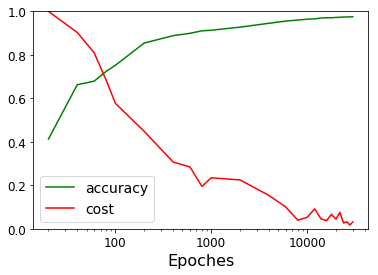

In [43]:
'''做出训练图'''
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
# fig.set_size_inches(8, 6)
cost_list = np.array(cost_list)/cost_list[0]
_ = ax.plot(epoch_list, acc_list, color='g', label='accuracy')
_ = ax.plot(epoch_list, cost_list, color='r', label='cost')      
_ = ax.legend(fontsize=14)
_ = ax.set_xscale('log')
_ = ax.set_ylim((0.0, 1.0))
_ = ax.set_xlabel('Epoches', fontsize=16)
_ = ax.set_xticklabels(labels=[1, 10, 100, 1000, 10000], fontsize=12)
_ = ax.set_yticklabels(labels=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=12)

## 7. 测试准确率

- 准确率为0.9749

In [19]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))
acc = accuracy.eval(feed_dict={x: test.values[:, 1:], y: vectorize(test.values[:, 0])})
print('accuracy : {0}'.format(acc))

accuracy : 0.9749000072479248


## 8. 查看识别错误的数字

In [24]:
def show_pic(ax, image, y_=None, label=None):
    '''
    作图函数：
    ax为Matplotlib.Axes对象；
    image为单个的mnist手写数字特征向量，image.shape is (784,)；
    y_为预测值；
    label为image对应的真实数字标签。
    '''
    img = image.reshape(28, 28)
    ax.imshow(img, cmap='Greys')
    ax.axis('off')
    if y_ != None:
        ax.text(28, 28, str(y_), color='r', fontsize=18)
    if label != None:
        ax.text(28, 14, str(label), color='black', fontsize=18)

- 这里输出了前100个识别错误的数字，图中数字右上角黑色数字是真实值，右下角红色数字是预测值。结果表明我们的模型还需要改进，因为这里头有不少人一眼就能认出来的数字，而模型没有识别出来。

In [20]:
prediction = y_.eval(feed_dict={x: test.values[:, 1:], y: vectorize(test.values[:, 0])})
'''将one-hot向量转换为对应数字'''
pred_flat = [np.argmax(pred) for pred in prediction]

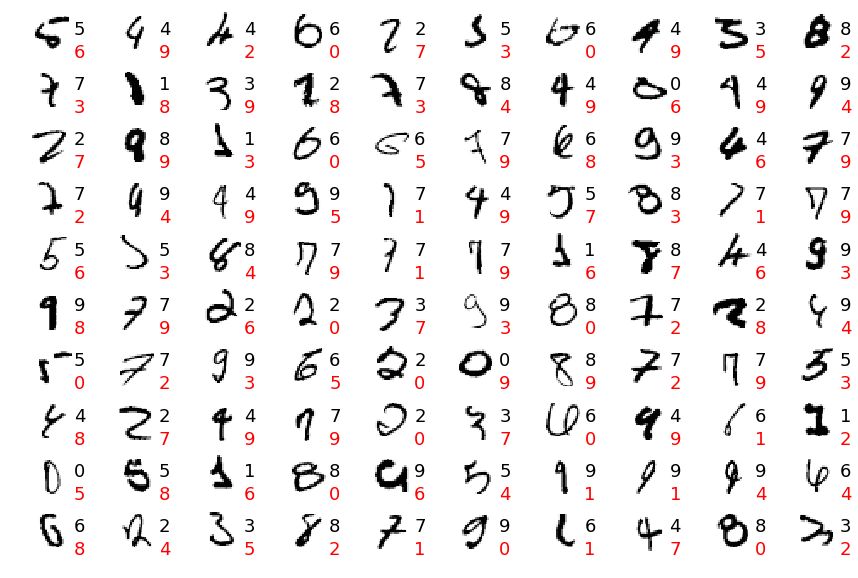

In [25]:
n = 10

fig, ax = plt.subplots(n, n, sharex=True, sharey=True)
fig.set_size_inches(15, 10)
ax = ax.flatten()

ax_id = 0
i = 0
while ax_id < n*n :
    image_i = test.values[i, 1:]
    yi = test.values[i, 0]
    pred_i = pred_flat[i]
    if pred_i != yi:
        show_pic(ax[ax_id], image_i, pred_i, int(yi))
        ax_id = ax_id + 1
    i = i + 1